<a href="https://colab.research.google.com/github/LuchoVidalSMN/CursoAECID/blob/main/Pr%C3%A1ctica_N%C2%B04_Estimacion_cuantitativa_de_precipitaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> Añadir blockquote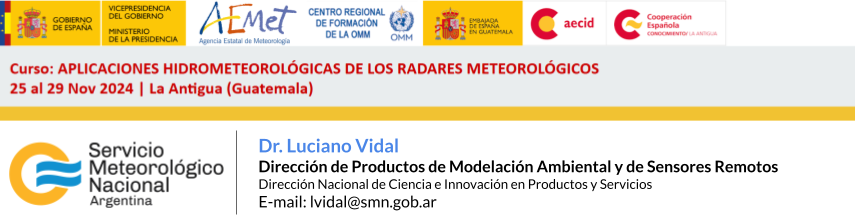



---
# **Práctica N°4:** Estimación cuantitativa de precipitación
La estimación cuantitativa de precipitación derivada de radar meteorológico (RQPE, por sus siglas en inglés Radar-based Quantitative Precipitation Estimation) juega un rol fundamental en numerosas aplicaciones hidrometeorológicas. El radar meteorológico se presenta como una herramienta capaz de
proporcionar una información espacial detallada del campo de lluvia a intervalos de tiempo breves sobre grandes extensiones

El **objetivo** entonces de esta práctica es poder implementar dos algoritmos sencillos para estimar la precipitacion utilizando solo la reflectividad y luego comparando si usamos la variable polarimetrica KDP.

## *¡Comencemos!* 💪
---

# **Instalación de librerías**
Si bien la herramienta Google Colaboratory trae un gran número de librerías preinstaladas, otras más específicas para el manejo de datos radar como [Py-ART](https://arm-doe.github.io/pyart/) no lo estan, y entonces tenemos que instalarlas. También algunas otras librerías que serán muy útiles al momento de graficar y querer agregar mapas y jugar con proyecciones como [Cartopy](https://scitools.org.uk/cartopy/docs/latest/).

In [ ]:
!pip install -qq --upgrade pip
!pip install -qq fsspec==2023.6.0
!pip install -qq pyproj
!pip install -qq netCDF4
!pip install -qq arm-pyart
!apt-get install -qq libgdal-dev libproj-dev
!pip install -qq --force-reinstall --no-binary shapely shapely==1.7.1
!pip install -qq cartopy==0.21
!pip install -qq glob2
!pip install -qq --user urllib3>=1.25
!pip install -qq wradlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.4/166.4 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.3/91.3 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 61.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2023.6.0 requires fsspec==2023.6.0,

# **Descarga de datos**
Para esta actividad solo utilizaremos un archivo con datos de radar en formato netCDF/CF-Radial. Vamos a descargar el archivo a trabajar y para ello vamos a usar el comando *wget*, que lo gaurdará en el disco local de la Google Colab (la nube!).

In [ ]:

# CARPETA ZIP CON ARCHIVOS
!wget -O data.zip https://www.dropbox.com/scl/fi/a8yvy6pt945wdni299gp1/RMA2_NC_20200311.zip?rlkey=61prrzd0nfr10wrpa0sbisbo2&dl=0
!unzip data.zip


--2023-11-08 17:31:48--  https://www.dropbox.com/scl/fi/a8yvy6pt945wdni299gp1/RMA2_NC_20200311.zip?rlkey=61prrzd0nfr10wrpa0sbisbo2
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucbca57686ce7d5248f7b750a34b.dl.dropboxusercontent.com/cd/0/inline/CHKnLi6MbPPbMi6O7OZDnXLRd0rryx6br1BmJrw54TkvbEZ2wD6f32Flf9OjHdR9yxP0P6YaWM_M7lO3Rri5GVDZzYpOuKOWT8AOiAhgy9-54mBG9wTortE7djKVYaxL0u8/file# [following]
--2023-11-08 17:31:49--  https://ucbca57686ce7d5248f7b750a34b.dl.dropboxusercontent.com/cd/0/inline/CHKnLi6MbPPbMi6O7OZDnXLRd0rryx6br1BmJrw54TkvbEZ2wD6f32Flf9OjHdR9yxP0P6YaWM_M7lO3Rri5GVDZzYpOuKOWT8AOiAhgy9-54mBG9wTortE7djKVYaxL0u8/file
Resolving ucbca57686ce7d5248f7b750a34b.dl.dropboxusercontent.com (ucbca57686ce7d5248f7b750a34b.dl.dropboxusercontent.com)... 162.125.6.15, 2620:100:601c:15::a27d:60f
Connecting to

# **Importamos las librerías**

In [ ]:

import glob
import pyart
import numpy as np
from matplotlib import pyplot as plt

import cartopy
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

costas = cartopy.feature.NaturalEarthFeature(
                                             category='physical',
                                             name='coastline',
                                             scale='10m',
                                             facecolor='none'
                                            )

paises = cartopy.feature.NaturalEarthFeature(
                                             category='cultural',
                                             name='admin_0_countries',
                                             scale='10m',
                                             facecolor='none'
                                            )

prov   = cartopy.feature.NaturalEarthFeature(
                                             category='cultural',
                                             name='admin_1_states_provinces_lines',
                                             scale='10m',
                                             facecolor='none'
                                            )



## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119

0.3.0


# **Lectura del dato**

In [ ]:

# Armamos una lista con los nombres de los archivos asi luego es mas facil leerlos
# dentro de un loop
lista_arch = np.sort(glob.glob('./RMA2_NC_20200311/*.nc'))

# Numero de archivo a leer
num_file = 12

# Creamos objeto "radar"
radar = pyart.io.read(lista_arch[num_file])

# Fecha y hora del escaneo
print(radar.time['units'][14:])

# Variables disponibles
print(radar.fields.keys())

# Datos del sitio radar
radar_lat = radar.latitude['data'][0]
radar_lon = radar.longitude['data'][0]
radar_alt = radar.altitude['data'][0]

# Elevaciones disponibles (PPI)
print(radar.fixed_angle['data'].data)


2020-03-11T10:55:53Z
dict_keys(['DBZV', 'DBZH', 'ZDR', 'KDP', 'RHOHV', 'PHIDP'])
[ 0.55  0.94  1.34  1.82  2.35  3.14  4.02  5.12  6.39  8.02 10.   12.46
 15.58 19.97 29.95]


# **Visualización PPI**

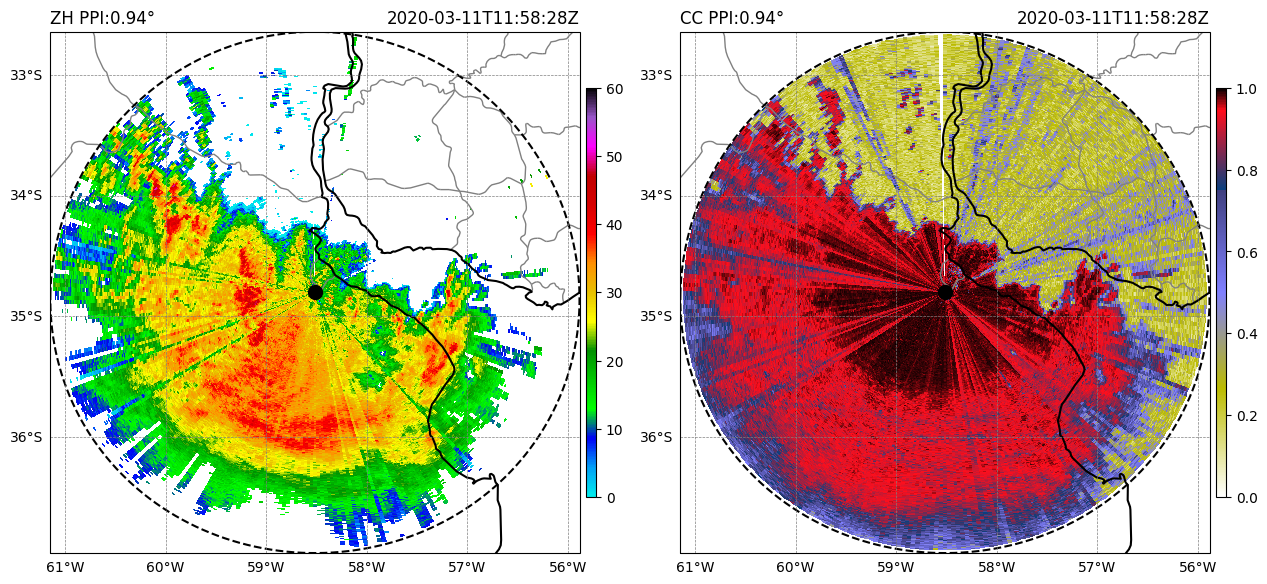

In [ ]:

#==============================================================================#

# Definimos la elevacion de interés (PPI)
NumPPI=1

# Indices de inicio y fin de PPI (necesarios para lo que sigue)
start_index = radar.sweep_start_ray_index['data'][NumPPI]
end_index   = radar.sweep_end_ray_index['data'][NumPPI]

# Extraemos las coordenadas LAT/LON de los pixeles del PPI
lats_rad = radar.gate_latitude['data'][start_index:end_index]
lons_rad = radar.gate_longitude['data'][start_index:end_index]

# Extraemos los datos de reflectividad horizontal
ZH  = radar.fields['DBZH']['data'][start_index:end_index, :]
RHO = radar.fields['RHOHV']['data'][start_index:end_index, :]
KDP = radar.fields['KDP']['data'][start_index:end_index, :]

#==============================================================================#

rmax=240.0
R=12742/2 # Radio medio de la Tierra
mm=2*np.pi*R/360
alfa=np.linspace(-np.pi,np.pi,10000)
lat_rmax = np.array([])
lon_rmax = np.array([])
for line in alfa:
  tmp1 = radar_lat + (rmax/mm)*np.sin(line)
  tmp2 = radar_lon + ((rmax/mm)*np.cos(line)/np.cos(tmp1*np.pi/180))
  lat_rmax = np.append(lat_rmax, tmp1)
  lon_rmax = np.append(lon_rmax, tmp2)

#==============================================================================#

fig, ax = plt.subplots(1, 2, figsize=(14,7), subplot_kw={'projection': ccrs.PlateCarree()}, squeeze=False)
fig.patch.set_facecolor('white')
fig.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=1e-10, hspace=0.15)

#==============================================================================#
#==========                REFLECTIVIDAD HORIZONTAL                  ==========#
#==============================================================================#

im=ax[0][0].pcolormesh(lons_rad, lats_rad, ZH, vmin=0, vmax=60, cmap='pyart_NWSRef')
plt.colorbar(im, ax=ax[0][0], aspect=40, pad=0.01, shrink=0.65)

# Agregamos mapa limites politicos
ax[0][0].add_feature(prov, facecolor='None', edgecolor='gray', linewidth=1.0)
ax[0][0].add_feature(paises, facecolor='None', edgecolor='k', linewidth=1.5)

# Grafico el limite exterior de los datos de radar (rmax)
ax[0][0].plot(lon_rmax, lat_rmax, '--k', lw=1.5)

# Graficamos posición sitio radar
ax[0][0].plot(radar_lon, radar_lat, 'ok', ms=10)

# Titulo de la figura
ax[0][0].set_title(radar.time['units'][14:], fontsize=12, loc='right')
ax[0][0].set_title('ZH PPI:'+str(radar.fixed_angle['data'][NumPPI])+'°', fontsize=12, loc='left')

ax[0][0].set_xlim([lon_rmax.min(), lon_rmax.max()])
ax[0][0].set_ylim([lat_rmax.min(), lat_rmax.max()])

ax[0][0].set_aspect(1.2)

# AGREGAMOS LINES Y MARCAS LAT/LON
gl = ax[0][0].gridlines(
                        crs=ccrs.PlateCarree(),
                        color='gray',
                        linestyle='--',
                        linewidth=0.5,
                        xlocs=np.arange(-180, 180, 1),
                        ylocs=np.arange(-90, 90, 1),
                        draw_labels=True
                       )
gl.top_labels = False
gl.right_labels = False

#==============================================================================#
#==========              COEF. DE CORRELACION CO-POLAR               ==========#
#==============================================================================#

im=ax[0][1].pcolormesh(lons_rad, lats_rad, RHO, vmin=0, vmax=1, cmap='gist_stern_r')
plt.colorbar(im, ax=ax[0][1], aspect=40, pad=0.01, shrink=0.65)

# Agregamos mapa limites politicos
ax[0][1].add_feature(prov, facecolor='None', edgecolor='gray', linewidth=1.0)
ax[0][1].add_feature(paises, facecolor='None', edgecolor='k', linewidth=1.5)

# Grafico el limite exterior de los datos de radar (rmax)
ax[0][1].plot(lon_rmax, lat_rmax, '--k', lw=1.5)

# Graficamos posición sitio radar
ax[0][1].plot(radar_lon, radar_lat, 'ok', ms=10)

# Titulo de la figura
ax[0][1].set_title(radar.time['units'][14:], fontsize=12, loc='right')
ax[0][1].set_title('CC PPI:'+str(radar.fixed_angle['data'][NumPPI])+'°', fontsize=12, loc='left')

ax[0][1].set_xlim([lon_rmax.min(), lon_rmax.max()])
ax[0][1].set_ylim([lat_rmax.min(), lat_rmax.max()])

ax[0][1].set_aspect(1.2)

# AGREGAMOS LINES Y MARCAS LAT/LON
gl = ax[0][1].gridlines(
                        crs=ccrs.PlateCarree(),
                        color='gray',
                        linestyle='--',
                        linewidth=0.5,
                        xlocs=np.arange(-180, 180, 1),
                        ylocs=np.arange(-90, 90, 1),
                        draw_labels=True
                       )
gl.top_labels = False
gl.right_labels = False

#==============================================================================#

# Guardamos la figura
#plt.savefig('ejemplo.png', transparent=False, bbox_inches='tight')

plt.show()


# **Estimación de precipitación con polarización simple**

## Reflectividad a precipitación

In [ ]:

# Parámetros relación Z-R
a=200
b=1.6

# El primer paso será "limpiar" los datos de reflectividad y para ello
# podemos valernos del coeficiente de correlacion co-polar con el cual "filtrar"
# ecos no meteorologicos usando algun umbral (ej. 0.8)
cZH = np.copy(ZH)
cZH[RHO<0.8]=np.nan

# Para evitar contaminacion por probable presencia de granizo, vamos a utilizar
# un umbral de 55 dBZ como valor maximo tolerable. Luego, a todos los pixeles que
# tienen valores superiores, le asignamos el valor 55.
cZH[cZH>55.]=55.0

# Convertimos reflectividad en escala logaritmica a lineal (mm6/m3)
# dBZ = 10*log10(Z) --> Hay que invertir esta ecuación!
Z = np.power(10.,cZH/10.)

# Obtenemos tasa instantanea de precipitación (rain rate: RR)
RR = np.power(Z/a,1/b)


## Visualización precipitación instatánea (rain rate)

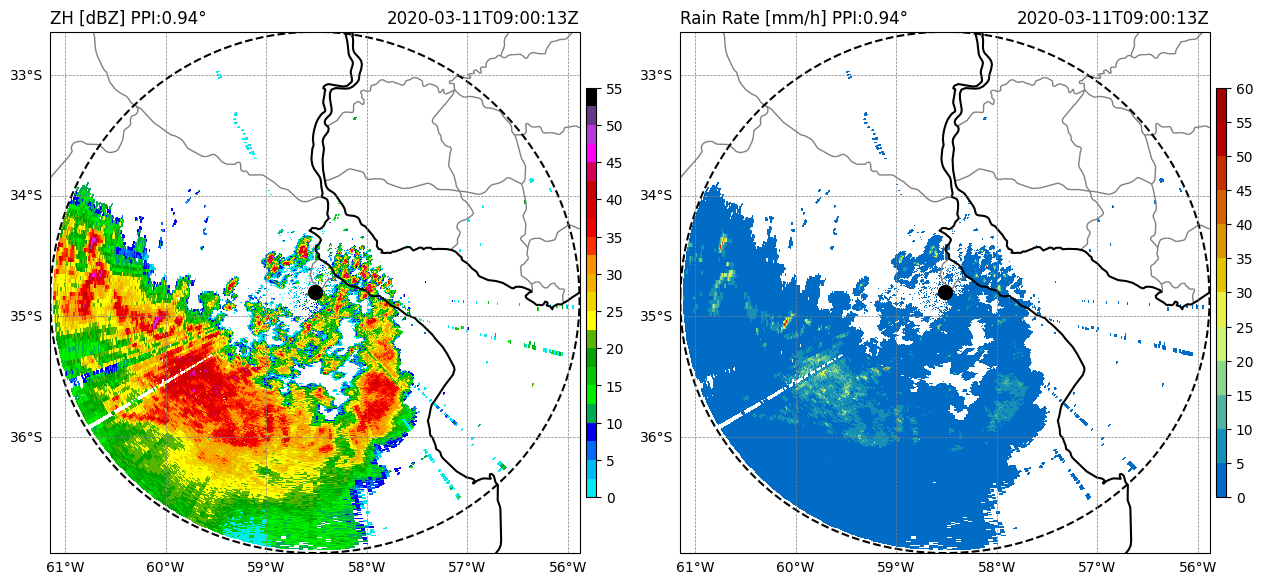

In [ ]:

#==============================================================================#

fig, ax = plt.subplots(1, 2, figsize=(14,7), subplot_kw={'projection': ccrs.PlateCarree()}, squeeze=False)
fig.patch.set_facecolor('white')
fig.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=1e-10, hspace=0.15)

#==============================================================================#
#==========                REFLECTIVIDAD HORIZONTAL                  ==========#
#==============================================================================#

cmap = plt.get_cmap('pyart_NWSRef', 22)

im=ax[0][0].pcolormesh(lons_rad, lats_rad, cZH, vmin=0, vmax=55, cmap=cmap)
plt.colorbar(im, ax=ax[0][0], aspect=40, pad=0.01, shrink=0.65, ticks=np.arange(0,55.01,5))

# Agregamos mapa limites politicos
ax[0][0].add_feature(prov, facecolor='None', edgecolor='gray', linewidth=1.0)
ax[0][0].add_feature(paises, facecolor='None', edgecolor='k', linewidth=1.5)

# Grafico el limite exterior de los datos de radar (rmax)
ax[0][0].plot(lon_rmax, lat_rmax, '--k', lw=1.5)

# Graficamos posición sitio radar
ax[0][0].plot(radar_lon, radar_lat, 'ok', ms=10)

# Titulo de la figura
ax[0][0].set_title(radar.time['units'][14:], fontsize=12, loc='right')
ax[0][0].set_title('ZH [dBZ] PPI:'+str(radar.fixed_angle['data'][NumPPI])+'°', fontsize=12, loc='left')

ax[0][0].set_xlim([lon_rmax.min(), lon_rmax.max()])
ax[0][0].set_ylim([lat_rmax.min(), lat_rmax.max()])

ax[0][0].set_aspect(1.2)

# AGREGAMOS LINES Y MARCAS LAT/LON
gl = ax[0][0].gridlines(
                        crs=ccrs.PlateCarree(),
                        color='gray',
                        linestyle='--',
                        linewidth=0.5,
                        xlocs=np.arange(-180, 180, 1),
                        ylocs=np.arange(-90, 90, 1),
                        draw_labels=True
                       )
gl.top_labels = False
gl.right_labels = False

#==============================================================================#
#==========              TASA INSTANTANEA DE PRECIPITACION           ==========#
#==============================================================================#

cmap = plt.get_cmap('pyart_HomeyerRainbow', 12)

im=ax[0][1].pcolormesh(lons_rad, lats_rad, RR, vmin=0, vmax=60, cmap=cmap)
plt.colorbar(im, ax=ax[0][1], aspect=40, pad=0.01, shrink=0.65, ticks=np.arange(0,60.01,5))

# Agregamos mapa limites politicos
ax[0][1].add_feature(prov, facecolor='None', edgecolor='gray', linewidth=1.0)
ax[0][1].add_feature(paises, facecolor='None', edgecolor='k', linewidth=1.5)

# Grafico el limite exterior de los datos de radar (rmax)
ax[0][1].plot(lon_rmax, lat_rmax, '--k', lw=1.5)

# Graficamos posición sitio radar
ax[0][1].plot(radar_lon, radar_lat, 'ok', ms=10)

# Titulo de la figura
ax[0][1].set_title(radar.time['units'][14:], fontsize=12, loc='right')
ax[0][1].set_title('Rain Rate [mm/h] PPI:'+str(radar.fixed_angle['data'][NumPPI])+'°', fontsize=12, loc='left')

ax[0][1].set_xlim([lon_rmax.min(), lon_rmax.max()])
ax[0][1].set_ylim([lat_rmax.min(), lat_rmax.max()])

ax[0][1].set_aspect(1.2)

# AGREGAMOS LINES Y MARCAS LAT/LON
gl = ax[0][1].gridlines(
                        crs=ccrs.PlateCarree(),
                        color='gray',
                        linestyle='--',
                        linewidth=0.5,
                        xlocs=np.arange(-180, 180, 1),
                        ylocs=np.arange(-90, 90, 1),
                        draw_labels=True
                       )
gl.top_labels = False
gl.right_labels = False

#==============================================================================#

# Guardamos la figura
#plt.savefig('ejemplo.png', transparent=False, bbox_inches='tight')

plt.show()


## Calculamos precipitación acumulada con Z-R

In [ ]:

#==============================================================================#
#===============          PARAMETROS DE CONFIGURACION           ===============#
#==============================================================================#

# Parámetros relación Z-R
a=200
b=1.6

# Definimos el PPI con el cual generar la precipitación
NumPPI=0

# Umbral de CC para ecos no meteorologicos
CCthr=-0.1

# Umbral de reflectividad para minimizar contaminacion por granizo
Zhail=55.0

# Definimos variable con las mismas dimensiones que el campo de reflectividad
# para ir acumulando la tasa instantanea RR.
# SUPOSICIÓN: la RR se mantiene constante entre escaneo y escaneo (~10min)
PAC = np.zeros([359,525])

#==============================================================================#

# Recorremos en un loop todos los archivos disponibles
for ifile in lista_arch :

  print(ifile)

  # Creamos objeto "radar"
  radar = pyart.io.read(ifile)

  # Indices de inicio y fin de PPI (necesarios para lo que sigue)
  start_index = radar.sweep_start_ray_index['data'][NumPPI]
  end_index   = radar.sweep_end_ray_index['data'][NumPPI]

  # Extraemos los datos de reflectividad horizontal
  ZH  = radar.fields['DBZH']['data'][start_index:end_index, :]
  RHO = radar.fields['RHOHV']['data'][start_index:end_index, :]

  # Eliminamos ecos no meteorologicos
  cZH = np.copy(ZH)
  cZH[RHO<CCthr]=np.nan

  # Contaminación por granizo
  cZH[cZH>Zhail]=Zhail

  # Conversion de escala logaritmica a lineal
  Z = np.power(10.,cZH/10.)

  # Obtenemos tasa instantanea de precipitación (rain rate: RR)
  RR = np.power(Z/a,1/b)

  # Acumulamos
  PAC = PAC + RR*(10./60.)

#==============================================================================#


./RMA2_NC_20200311/cfrad.20200311_090013.0000_to_20200311_090559.0000_RMA2_0200_01.nc
./RMA2_NC_20200311/cfrad.20200311_090855.0000_to_20200311_091448.0000_RMA2_0200_01.nc
./RMA2_NC_20200311/cfrad.20200311_091825.0000_to_20200311_092413.0000_RMA2_0200_01.nc
./RMA2_NC_20200311/cfrad.20200311_092712.0000_to_20200311_093305.0000_RMA2_0200_01.nc
./RMA2_NC_20200311/cfrad.20200311_094436.0000_to_20200311_095029.0000_RMA2_0200_01.nc
./RMA2_NC_20200311/cfrad.20200311_095406.0000_to_20200311_095954.0000_RMA2_0200_01.nc
./RMA2_NC_20200311/cfrad.20200311_100253.0000_to_20200311_100846.0000_RMA2_0200_01.nc
./RMA2_NC_20200311/cfrad.20200311_101135.0000_to_20200311_101728.0000_RMA2_0200_01.nc
./RMA2_NC_20200311/cfrad.20200311_102017.0000_to_20200311_102603.0000_RMA2_0200_01.nc
./RMA2_NC_20200311/cfrad.20200311_102947.0000_to_20200311_103541.0000_RMA2_0200_01.nc
./RMA2_NC_20200311/cfrad.20200311_103829.0000_to_20200311_104423.0000_RMA2_0200_01.nc
./RMA2_NC_20200311/cfrad.20200311_104711.0000_to_20200

## Precipitación acumulada con Z-R

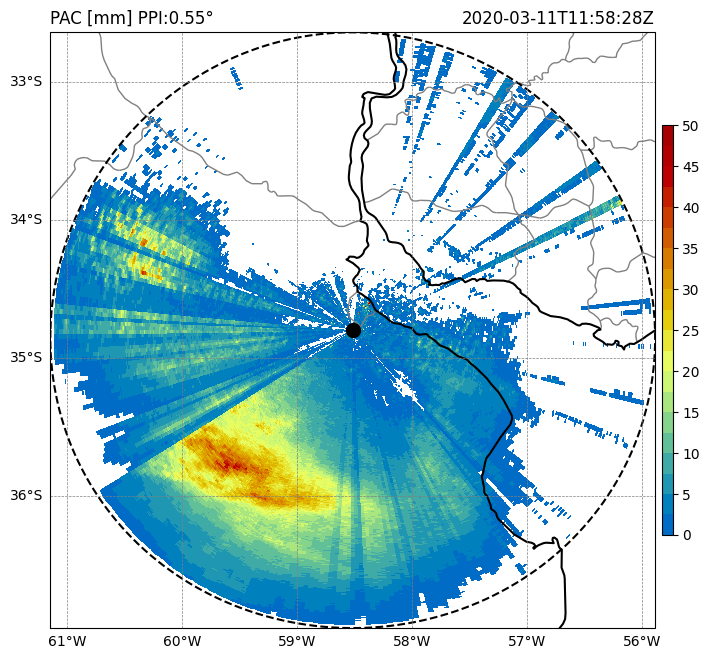

In [ ]:

PAC[PAC<1.0]=np.nan

fig, ax = plt.subplots(1, 1, figsize=(8,7), subplot_kw={'projection': ccrs.PlateCarree()}, squeeze=False)
fig.patch.set_facecolor('white')
fig.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=1e-10, hspace=0.15)

cmap = plt.get_cmap('pyart_HomeyerRainbow', 20)

im=ax[0][0].pcolormesh(lons_rad, lats_rad, PAC, vmin=0, vmax=50, cmap=cmap)
plt.colorbar(im, ax=ax[0][0], aspect=40, pad=0.01, shrink=0.65, ticks=np.arange(0,50.01,5))

# Agregamos mapa limites politicos
ax[0][0].add_feature(prov, facecolor='None', edgecolor='gray', linewidth=1.0)
ax[0][0].add_feature(paises, facecolor='None', edgecolor='k', linewidth=1.5)

# Grafico el limite exterior de los datos de radar (rmax)
ax[0][0].plot(lon_rmax, lat_rmax, '--k', lw=1.5)

# Graficamos posición sitio radar
ax[0][0].plot(radar_lon, radar_lat, 'ok', ms=10)

# Titulo de la figura
ax[0][0].set_title(radar.time['units'][14:], fontsize=12, loc='right')
ax[0][0].set_title('PAC [mm] PPI:'+str(radar.fixed_angle['data'][NumPPI])+'°', fontsize=12, loc='left')

ax[0][0].set_xlim([lon_rmax.min(), lon_rmax.max()])
ax[0][0].set_ylim([lat_rmax.min(), lat_rmax.max()])

ax[0][0].set_aspect(1.2)

# AGREGAMOS LINES Y MARCAS LAT/LON
gl = ax[0][0].gridlines(
                        crs=ccrs.PlateCarree(),
                        color='gray',
                        linestyle='--',
                        linewidth=0.5,
                        xlocs=np.arange(-180, 180, 1),
                        ylocs=np.arange(-90, 90, 1),
                        draw_labels=True
                       )
gl.top_labels = False
gl.right_labels = False

# Guardamos la figura
#plt.savefig('ejemplo.png', transparent=False, bbox_inches='tight')

plt.show()


# **Estimación la precipitación con doble polarización**

## KDP a precipitación

In [ ]:

# Parámetros relación R-KDP
a=47.2
b=0.73

# Obtenemos tasa instantanea de precipitación (rain rate: RR)
RR = a*np.power(KDP.data,b)
RR[RR==0.0]=np.nan


## Visualización precipitación instatánea (rain rate)

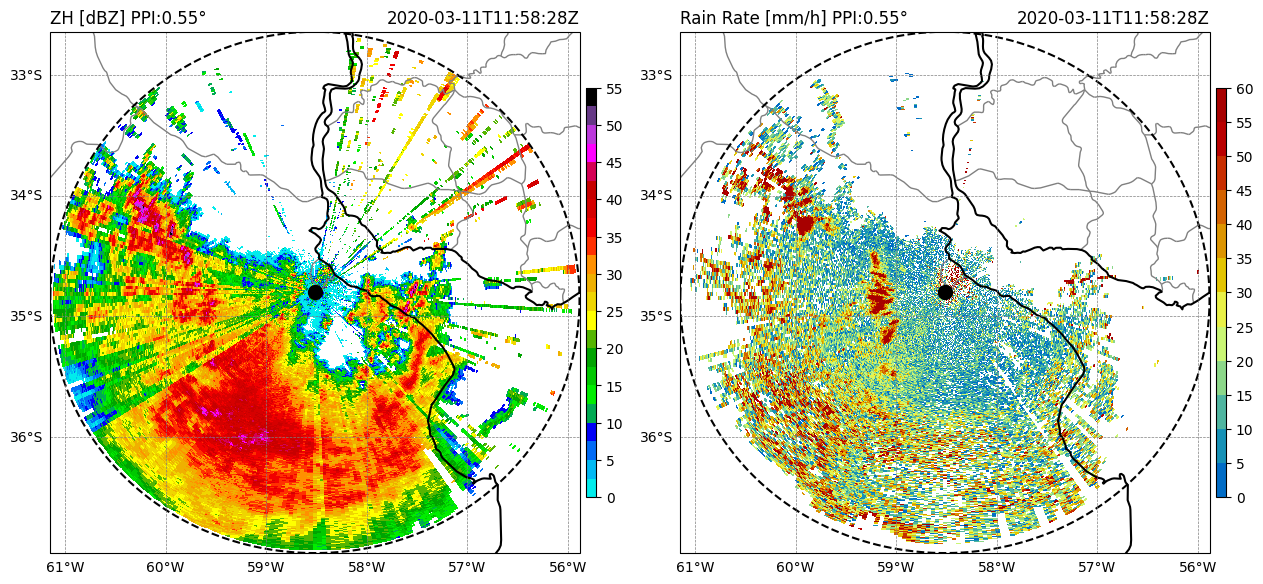

In [ ]:

#==============================================================================#

fig, ax = plt.subplots(1, 2, figsize=(14,7), subplot_kw={'projection': ccrs.PlateCarree()}, squeeze=False)
fig.patch.set_facecolor('white')
fig.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=1e-10, hspace=0.15)

#==============================================================================#
#==========                REFLECTIVIDAD HORIZONTAL                  ==========#
#==============================================================================#

cmap = plt.get_cmap('pyart_NWSRef', 22)

im=ax[0][0].pcolormesh(lons_rad, lats_rad, ZH, vmin=0, vmax=55, cmap=cmap)
plt.colorbar(im, ax=ax[0][0], aspect=40, pad=0.01, shrink=0.65, ticks=np.arange(0,55.01,5))

# Agregamos mapa limites politicos
ax[0][0].add_feature(prov, facecolor='None', edgecolor='gray', linewidth=1.0)
ax[0][0].add_feature(paises, facecolor='None', edgecolor='k', linewidth=1.5)

# Grafico el limite exterior de los datos de radar (rmax)
ax[0][0].plot(lon_rmax, lat_rmax, '--k', lw=1.5)

# Graficamos posición sitio radar
ax[0][0].plot(radar_lon, radar_lat, 'ok', ms=10)

# Titulo de la figura
ax[0][0].set_title(radar.time['units'][14:], fontsize=12, loc='right')
ax[0][0].set_title('ZH [dBZ] PPI:'+str(radar.fixed_angle['data'][NumPPI])+'°', fontsize=12, loc='left')

ax[0][0].set_xlim([lon_rmax.min(), lon_rmax.max()])
ax[0][0].set_ylim([lat_rmax.min(), lat_rmax.max()])

ax[0][0].set_aspect(1.2)

# AGREGAMOS LINES Y MARCAS LAT/LON
gl = ax[0][0].gridlines(
                        crs=ccrs.PlateCarree(),
                        color='gray',
                        linestyle='--',
                        linewidth=0.5,
                        xlocs=np.arange(-180, 180, 1),
                        ylocs=np.arange(-90, 90, 1),
                        draw_labels=True
                       )
gl.top_labels = False
gl.right_labels = False

#==============================================================================#
#==========              TASA INSTANTANEA DE PRECIPITACION           ==========#
#==============================================================================#

cmap = plt.get_cmap('pyart_HomeyerRainbow', 12)

im=ax[0][1].pcolormesh(lons_rad, lats_rad, RR, vmin=0, vmax=60, cmap=cmap)
plt.colorbar(im, ax=ax[0][1], aspect=40, pad=0.01, shrink=0.65, ticks=np.arange(0,60.01,5))

# Agregamos mapa limites politicos
ax[0][1].add_feature(prov, facecolor='None', edgecolor='gray', linewidth=1.0)
ax[0][1].add_feature(paises, facecolor='None', edgecolor='k', linewidth=1.5)

# Grafico el limite exterior de los datos de radar (rmax)
ax[0][1].plot(lon_rmax, lat_rmax, '--k', lw=1.5)

# Graficamos posición sitio radar
ax[0][1].plot(radar_lon, radar_lat, 'ok', ms=10)

# Titulo de la figura
ax[0][1].set_title(radar.time['units'][14:], fontsize=12, loc='right')
ax[0][1].set_title('Rain Rate [mm/h] PPI:'+str(radar.fixed_angle['data'][NumPPI])+'°', fontsize=12, loc='left')

ax[0][1].set_xlim([lon_rmax.min(), lon_rmax.max()])
ax[0][1].set_ylim([lat_rmax.min(), lat_rmax.max()])

ax[0][1].set_aspect(1.2)

# AGREGAMOS LINES Y MARCAS LAT/LON
gl = ax[0][1].gridlines(
                        crs=ccrs.PlateCarree(),
                        color='gray',
                        linestyle='--',
                        linewidth=0.5,
                        xlocs=np.arange(-180, 180, 1),
                        ylocs=np.arange(-90, 90, 1),
                        draw_labels=True
                       )
gl.top_labels = False
gl.right_labels = False

#==============================================================================#

# Guardamos la figura
#plt.savefig('ejemplo.png', transparent=False, bbox_inches='tight')

plt.show()


## Calculamos precipitación acumulada con R-KDP

In [ ]:

#==============================================================================#
#===============          PARAMETROS DE CONFIGURACION           ===============#
#==============================================================================#

# Parámetros relación R-KDP
a=47.2
b=0.73

# Definimos el PPI con el cual generar la precipitación
NumPPI=0

# Definimos variable con las mismas dimensiones que el campo de reflectividad
# para ir acumulando la tasa instantanea RR.
# SUPOSICIÓN: la RR se mantiene constante entre escaneo y escaneo (~10min)
PAC = np.zeros([359,525])

#==============================================================================#

# Recorremos en un loop todos los archivos disponibles
for ifile in lista_arch :

  print(ifile)

  # Creamos objeto "radar"
  radar = pyart.io.read(ifile)

  # ¿KDP esta disponible?
  if 'KDP' in radar.fields.keys() :

    # Indices de inicio y fin de PPI (necesarios para lo que sigue)
    start_index = radar.sweep_start_ray_index['data'][NumPPI]
    end_index   = radar.sweep_end_ray_index['data'][NumPPI]

    # Extraemos los datos de KDP
    KDP = radar.fields['KDP']['data'][start_index:end_index, :]
    KDP_data = KDP.data
    KDP_data[KDP_data<0]=0

    # Obtenemos tasa instantanea de precipitación (rain rate: RR)
    RR = a*np.power(KDP_data,b)

    # Acumulamos
    PAC = PAC + RR*(10./60.)

  else :

    continue

#==============================================================================#


./RMA2_NC_20200311/cfrad.20200311_090013.0000_to_20200311_090559.0000_RMA2_0200_01.nc
./RMA2_NC_20200311/cfrad.20200311_090855.0000_to_20200311_091448.0000_RMA2_0200_01.nc
./RMA2_NC_20200311/cfrad.20200311_091825.0000_to_20200311_092413.0000_RMA2_0200_01.nc
./RMA2_NC_20200311/cfrad.20200311_092712.0000_to_20200311_093305.0000_RMA2_0200_01.nc
./RMA2_NC_20200311/cfrad.20200311_094436.0000_to_20200311_095029.0000_RMA2_0200_01.nc
./RMA2_NC_20200311/cfrad.20200311_095406.0000_to_20200311_095954.0000_RMA2_0200_01.nc
./RMA2_NC_20200311/cfrad.20200311_100253.0000_to_20200311_100846.0000_RMA2_0200_01.nc
./RMA2_NC_20200311/cfrad.20200311_101135.0000_to_20200311_101728.0000_RMA2_0200_01.nc
./RMA2_NC_20200311/cfrad.20200311_102017.0000_to_20200311_102603.0000_RMA2_0200_01.nc
./RMA2_NC_20200311/cfrad.20200311_102947.0000_to_20200311_103541.0000_RMA2_0200_01.nc
./RMA2_NC_20200311/cfrad.20200311_103829.0000_to_20200311_104423.0000_RMA2_0200_01.nc
./RMA2_NC_20200311/cfrad.20200311_104711.0000_to_20200

## Precipitación acumulada con R-KDP

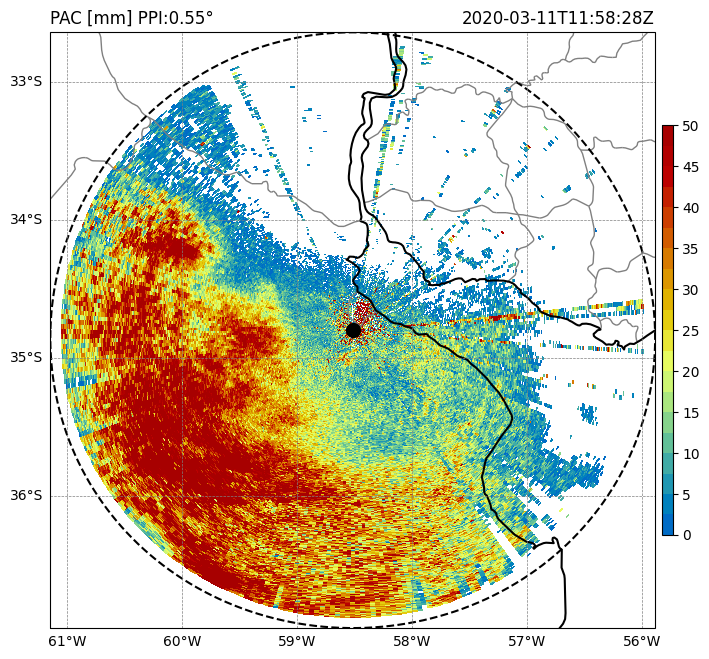

In [ ]:

PAC[PAC<1.0]=np.nan

fig, ax = plt.subplots(1, 1, figsize=(8,7), subplot_kw={'projection': ccrs.PlateCarree()}, squeeze=False)
fig.patch.set_facecolor('white')
fig.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=1e-10, hspace=0.15)

cmap = plt.get_cmap('pyart_HomeyerRainbow', 20)

im=ax[0][0].pcolormesh(lons_rad, lats_rad, PAC, vmin=0, vmax=50, cmap=cmap)
plt.colorbar(im, ax=ax[0][0], aspect=40, pad=0.01, shrink=0.65, ticks=np.arange(0,50.01,5))

# Agregamos mapa limites politicos
ax[0][0].add_feature(prov, facecolor='None', edgecolor='gray', linewidth=1.0)
ax[0][0].add_feature(paises, facecolor='None', edgecolor='k', linewidth=1.5)

# Grafico el limite exterior de los datos de radar (rmax)
ax[0][0].plot(lon_rmax, lat_rmax, '--k', lw=1.5)

# Graficamos posición sitio radar
ax[0][0].plot(radar_lon, radar_lat, 'ok', ms=10)

# Titulo de la figura
ax[0][0].set_title(radar.time['units'][14:], fontsize=12, loc='right')
ax[0][0].set_title('PAC [mm] PPI:'+str(radar.fixed_angle['data'][NumPPI])+'°', fontsize=12, loc='left')

ax[0][0].set_xlim([lon_rmax.min(), lon_rmax.max()])
ax[0][0].set_ylim([lat_rmax.min(), lat_rmax.max()])

ax[0][0].set_aspect(1.2)

# AGREGAMOS LINES Y MARCAS LAT/LON
gl = ax[0][0].gridlines(
                        crs=ccrs.PlateCarree(),
                        color='gray',
                        linestyle='--',
                        linewidth=0.5,
                        xlocs=np.arange(-180, 180, 1),
                        ylocs=np.arange(-90, 90, 1),
                        draw_labels=True
                       )
gl.top_labels = False
gl.right_labels = False

# Guardamos la figura
#plt.savefig('ejemplo.png', transparent=False, bbox_inches='tight')

plt.show()
